In [442]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Read data

In [443]:
#readdata
import json
data="data.json"
with open(data,'r') as file:
  data=json.load(file)

In [444]:
stocktrain=data['ACB']

In [445]:
import pandas as pd
from ast import literal_eval  

def convert_str_to_float(str_num):
    return float(str_num.replace(',', ''))
data_dict = {key: literal_eval(value) for key, value in stocktrain.items()}

df = pd.DataFrame.from_dict(data_dict, orient='index')
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

df = df.map(convert_str_to_float)
df=df.sort_index(ascending=True)

print(df)


               open     high      low    close      volume
2021-11-09  22320.0  22587.0  22286.0  22353.0   6598500.0
2021-11-10  22386.0  22420.0  22152.0  22320.0   5794500.0
2021-11-11  22253.0  22420.0  21718.0  22052.0   7503700.0
2021-11-12  22052.0  22286.0  21818.0  22286.0  17087412.0
2021-11-15  22320.0  22453.0  22219.0  22320.0   5435700.0
...             ...      ...      ...      ...         ...
2024-02-16  27500.0  27600.0  27300.0  27600.0   9495400.0
2024-02-19  27700.0  27700.0  27200.0  27700.0  11856900.0
2024-02-20  27500.0  27750.0  27350.0  27550.0   7316400.0
2024-02-21  27500.0  27900.0  27400.0  27700.0  10251900.0
2024-02-22  27700.0  27750.0  27500.0  27650.0   7401800.0

[570 rows x 5 columns]


In [446]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 570 entries, 2021-11-09 to 2024-02-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    570 non-null    float64
 1   high    570 non-null    float64
 2   low     570 non-null    float64
 3   close   570 non-null    float64
 4   volume  570 non-null    float64
dtypes: float64(5)
memory usage: 26.7 KB
None
               open          high           low         close        volume
count    570.000000    570.000000    570.000000    570.000000  5.700000e+02
mean   21345.387719  21573.343860  21111.891228  21331.980702  6.457273e+06
std     1994.071256   1970.326041   2031.899244   2009.391929  4.683361e+06
min    14952.000000  15620.000000  14576.000000  14618.000000  7.580000e+05
25%    20382.000000  20549.000000  20131.000000  20262.250000  3.370840e+06
50%    21600.000000  21750.000000  21325.000000  21600.000000  5.255700e+06
75%    22386.000000  22550.000000  22152

Data visualization

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

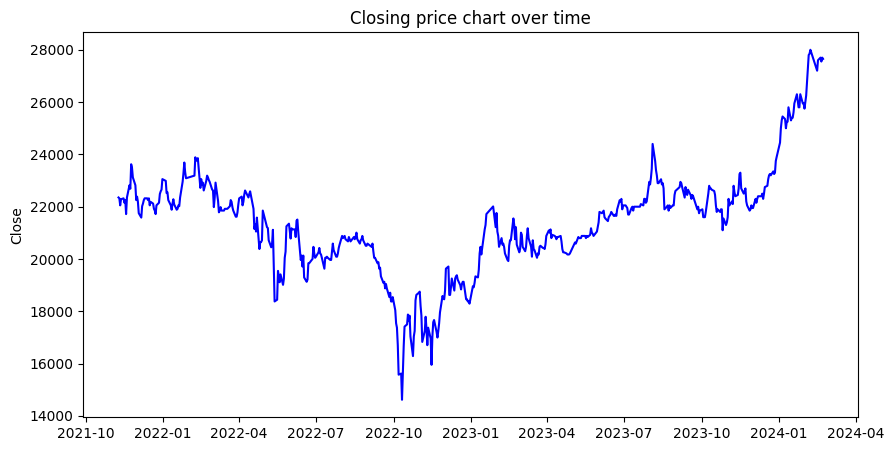

In [447]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df.index, y='close', data=df, ax=axes, color='blue')
axes.set_title('Closing price chart over time')
axes.set_ylabel('Close')

plt.show()


Data processing

AxesSubplot(0.125,0.11;0.775x0.77)
index: 2021-11-10 00:00:00  pos:  0  neg:  -33.0
index: 2021-11-11 00:00:00  pos:  0  neg:  -301.0
index: 2021-11-12 00:00:00  pos:  234.0  neg:  -67.0
index: 2021-11-15 00:00:00  pos:  268.0  neg:  -33.0
index: 2021-11-16 00:00:00  pos:  100.0  neg:  -201.0
index: 2021-11-17 00:00:00  pos:  201.0  neg:  -100.0
index: 2021-11-18 00:00:00  pos:  0  neg:  -635.0
index: 2021-11-19 00:00:00  pos:  635.0  neg:  0
index: 2021-11-22 00:00:00  pos:  1103.0  neg:  0
index: 2021-11-23 00:00:00  pos:  969.0  neg:  -134.0
index: 2021-11-24 00:00:00  pos:  1905.0  neg:  0
index: 2021-11-25 00:00:00  pos:  0  neg:  -134.0
index: 2021-11-26 00:00:00  pos:  0  neg:  -502.0
index: 2021-11-29 00:00:00  pos:  0  neg:  -802.0
index: 2021-11-30 00:00:00  pos:  0  neg:  -1370.0
index: 2021-12-01 00:00:00  pos:  133.0  neg:  0
index: 2021-12-02 00:00:00  pos:  0  neg:  -200.0
index: 2021-12-03 00:00:00  pos:  0  neg:  -634.0
index: 2021-12-06 00:00:00  pos:  0  neg:  -802.0

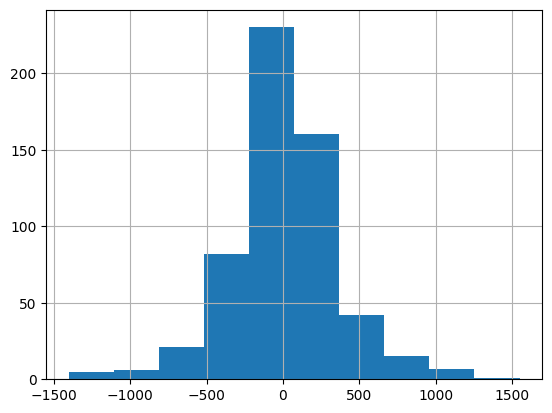

In [448]:


def cusum_filter(dataset, threshold):
    pos_dates, neg_dates = [], []
    pos_sum, neg_sum = 0, 0
    
    dataset['Differences'] = dataset['close'].diff()
    print(dataset['Differences'].hist())
    for i, r in dataset.iloc[1:].iterrows():
        pos_sum = max(0, pos_sum + r['Differences'])
        neg_sum = min(0, neg_sum + r['Differences'])
        print("index:",i," pos: ",pos_sum," neg: ",neg_sum)
        if pos_sum > threshold:
            pos_sum = 0  # Reset
            pos_dates.append(i)
        elif neg_sum < -threshold:
            neg_sum = 0  # Reset
            neg_dates.append(i)
    
    return pos_dates, neg_dates

threshold_value = 1200
dataframe=df

positive_dates, negative_dates = cusum_filter(dataframe, threshold_value)



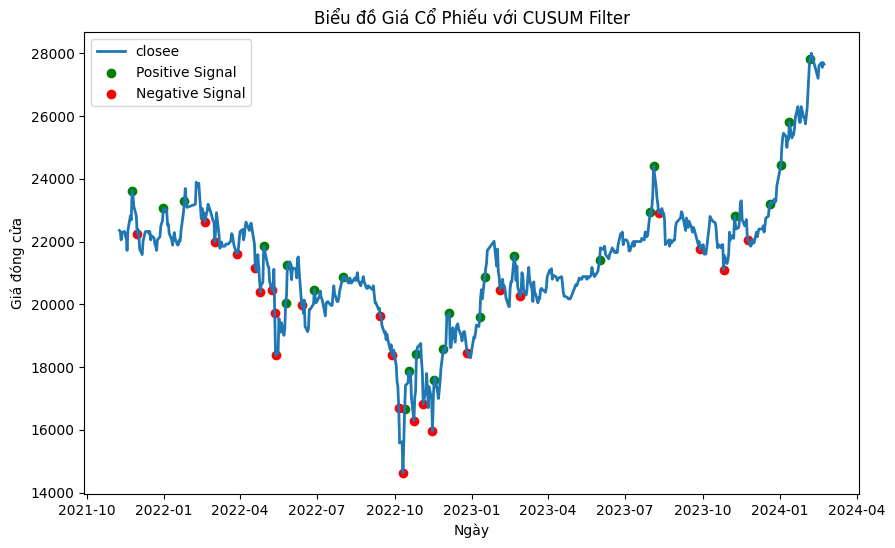

In [449]:
plt.figure(figsize=(10, 6))
plt.plot(dataframe.index, dataframe['close'], label='closee', linewidth=2)
plt.scatter(positive_dates, dataframe['close'].loc[positive_dates], marker='o', color='g', label='Positive Signal')
plt.scatter(negative_dates, dataframe['close'].loc[negative_dates], marker='o', color='r', label='Negative Signal')
plt.title('Biểu đồ Giá Cổ Phiếu với CUSUM Filter')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.show()

In [450]:
df

,open,high,low,close,volume,Differences
2021-11-09,22320.0,22587.0,22286.0,22353.0,6598500.0,NaN
2021-11-10,22386.0,22420.0,22152.0,22320.0,5794500.0,-33.0
2021-11-11,22253.0,22420.0,21718.0,22052.0,7503700.0,-268.0
2021-11-12,22052.0,22286.0,21818.0,22286.0,17087412.0,234.0
2021-11-15,22320.0,22453.0,22219.0,22320.0,5435700.0,34.0
...,...,...,...,...,...,...
2024-02-16,27500.0,27600.0,27300.0,27600.0,9495400.0,400.0
2024-02-19,27700.0,27700.0,27200.0,27700.0,11856900.0,100.0
2024-02-20,27500.0,27750.0,27350.0,27550.0,7316400.0,-150.0
2024-02-21,27500.0,27900.0,27400.0,27700.0,10251900.0,150.0


Sử dụng biểu đồ CUSUM :
Khi tích lũy dương vượt ngưỡng dương thì sẽ có xu hướng tăng:nên mua
Khi tích lũy âm vượt ngưỡng âm thì sẽ có xu hướng giảm:nên bán

In [451]:
# plt.figure(figsize=(10, 6))
# plt.plot(df.index, df['close'], label='Giá đóng cửa', linewidth=2)
# plt.scatter(df_filtered.index[df_filtered['buy_signal']], df_filtered['close'][df_filtered['buy_signal']], marker='^', color='g', label='Mua')
# plt.scatter(df_filtered.index[df_filtered['sell_signal']], df_filtered['close'][df_filtered['sell_signal']], marker='v', color='r', label='Bán')
# plt.title('Biểu đồ Giá Cổ Phiếu với Tín Hiệu Mua/Bán từ CUSUM Filter')
# plt.xlabel('Ngày')
# plt.ylabel('Giá đóng cửa')
# plt.legend()
# plt.show()

In [452]:
# # Thiết lập ngưỡng cho CUSUM filter
# threshold = 1


# # Tính toán sự chênh lệch giữa giá trị thực tế và giá trị trung bình
# df_month['mean'] = df_month['close'].expanding().mean()
# df_month['diff'] = df_month['close'] - df_month['mean']

# # Tính toán CUSUM filter
# df_month['cusum'] = np.cumsum(df_month['diff'])

# # Tìm các điểm vượt ngưỡng
# events = df_month[df_month['cusum'].abs() > threshold]

# # Trực quan hóa kết quả
# plt.figure(figsize=(12, 6))
# plt.plot(df_month.index, df_month['close'], label='Close Price')
# plt.scatter(events.index, events['close'], color='red', label='CUSUM Event')
# plt.axhline(y=df_month['mean'].iloc[-1], color='black', linestyle='--', label='Mean')
# plt.legend()
# plt.show()

In [453]:
# def calculate_z_score(series, window_size):

    
#     # Tính Z-Score
#     rolling_mean = series.rolling(window=window_size).mean()
#     rolling_std = series.rolling(window=window_size).std()
#     z_score = (series - rolling_mean) / rolling_std

#     return z_score

In [454]:
# # Đặt ngưỡng
# threshold = 0.5

# # Tính toán và áp dụng Z-Score
# df_month['z_score'] = calculate_z_score(df_month['close'], window_size=5)

# # Kích hoạt sự kiện dựa trên ngưỡng
# df_month['event'] = np.where(df_month['z_score'] > threshold, 1, 0)

# # Trực quan hóa
# plt.figure(figsize=(10, 6))
# plt.plot(df_month['close'], label='Close Price', color='blue')
# plt.scatter(df_month.index[df_month['event'] == 1], df_month['close'][df_month['event'] == 1], color='red', label='Z-Score Event')
# plt.axhline(y=df_month['close'].mean() + threshold * df_month['close'].std(), color='green', linestyle='--', label='Threshold')
# plt.title('Z-Score Filter')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

Create Y feature

In [455]:


# def construct_y_feature(price_series, upper_barrier_pct, lower_barrier_pct, expiration_bars):
#     """
#     Xây dựng đặc trưng Y sử dụng phương pháp triple barrier.

#     Tham số:
#     - price_series: Chuỗi Pandas chứa dữ liệu giá.
#     - upper_barrier_pct: Phần trăm cho ngưỡng trên.
#     - lower_barrier_pct: Phần trăm cho ngưỡng dưới.
#     - expiration_bars: Số thanh cột cho giới hạn hết hạn.

#     Trả về:
#     - Chuỗi Pandas với các nhãn (1, -1, 0) dựa trên ngưỡng chạm.
#     """
#     price_diff = price_series.pct_change().dropna()
#     volatility = price_diff.rolling(window=20).std()  # Điều chỉnh kích thước cửa sổ nếu cần

#     upper_barrier = price_series.shift(-1) * (1 + upper_barrier_pct)
#     lower_barrier = price_series.shift(-1) * (1 - lower_barrier_pct)
#     vertical_barrier = price_series.index + pd.Timedelta(days=expiration_bars)

#     labels = []

#     for idx, (upper, lower, expiration) in enumerate(zip(upper_barrier, lower_barrier, vertical_barrier)):
#         if price_series[idx] >= upper:
#             labels.append(1)
#         elif price_series[idx] <= lower:
#             labels.append(-1)
#         elif price_series.index[idx] >= expiration:
#             labels.append(0)
#         else:
#             labels.append(None)

#     return pd.Series(labels, index=price_series.index)

# # Ví dụ sử dụng:
# # Giả sử bạn có một DataFrame df với một cột 'close'
# # Điều chỉnh các tham số dựa trên yêu cầu cụ thể của bạn
# upper_barrier_pct = 0.02  # 2% ngưỡng trên
# lower_barrier_pct = 0.02  # 2% ngưỡng dưới
# expiration_bars = 5  # Giới hạn hết hạn là 5 thanh cột

# df['y_feature'] = construct_y_feature(df['close'], upper_barrier_pct, lower_barrier_pct, expiration_bars)


In [456]:
df['close'].describe()

count      570.000000
mean     21331.980702
std       2009.391929
min      14618.000000
25%      20262.250000
50%      21600.000000
75%      22342.500000
max      28000.000000
Name: close, dtype: float64

In [457]:
import pandas as pd
import numpy as np

def detect_peaks(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filtered_y = np.copy(y)  # Sử dụng một bản sao của y để tạo filtered_y

    avg_filter = np.mean(y[:lag])
    std_filter = np.std(y[:lag])

    for i in range(lag, len(y)):
        if np.abs(y[i] - avg_filter) > threshold * std_filter:
            if y[i] > avg_filter:
                signals[i] = 1  # Positive signal
            else:
                signals[i] = -1  # Negative signal
            if i < len(y) - 1:
                filtered_y[i+1] = influence * y[i+1] + (1 - influence) * filtered_y[i]
        else:
            signals[i] = 0  # No signal
            if i < len(y) - 1:
                filtered_y[i+1] = y[i+1]

        avg_filter = np.mean(filtered_y[max(i-lag+1, 0):i+1])
        std_filter = np.std(filtered_y[max(i-lag+1, 0):i+1])

    return signals

lag = 10
threshold = 2.5
influence = 0.3

df['signals'] = detect_peaks(df['close'], lag, threshold, influence)

# In kết quả
print(df[['close', 'signals']])


              close  signals
2021-11-09  22353.0      0.0
2021-11-10  22320.0      0.0
2021-11-11  22052.0      0.0
2021-11-12  22286.0      0.0
2021-11-15  22320.0      0.0
...             ...      ...
2024-02-16  27600.0      0.0
2024-02-19  27700.0      0.0
2024-02-20  27550.0      0.0
2024-02-21  27700.0      0.0
2024-02-22  27650.0      0.0

[570 rows x 2 columns]


C:\Users\nguye\AppData\Local\Temp\ipykernel_21884\2689132503.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(y[i] - avg_filter) > threshold * std_filter:
C:\Users\nguye\AppData\Local\Temp\ipykernel_21884\2689132503.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filtered_y[i+1] = y[i+1]
C:\Users\nguye\AppData\Local\Temp\ipykernel_21884\2689132503.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y[i] > avg_

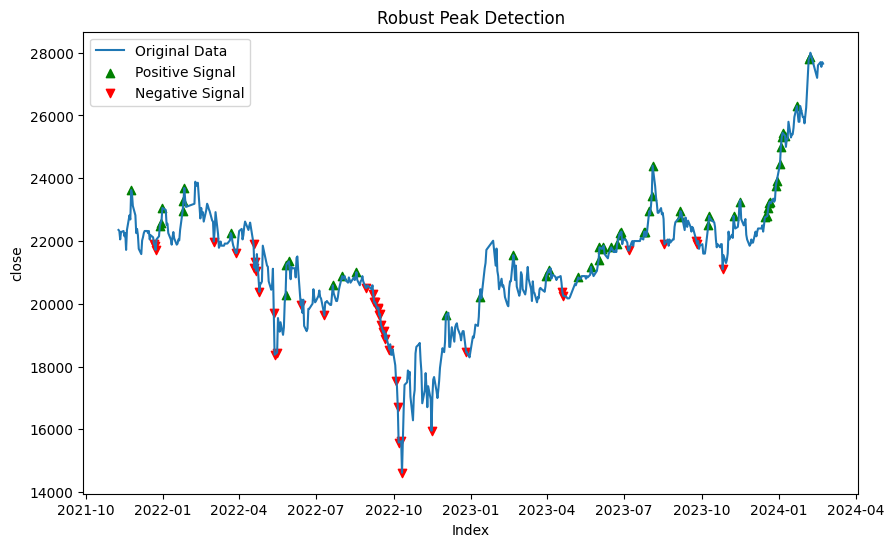

In [458]:
# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Original Data')
plt.scatter(df.index[df['signals'] == 1], df['close'][df['signals'] == 1], color='green', label='Positive Signal', marker='^')
plt.scatter(df.index[df['signals'] == -1], df['close'][df['signals'] == -1], color='red', label='Negative Signal', marker='v')
plt.title('Robust Peak Detection')
plt.xlabel('Index')
plt.ylabel('close')
plt.legend()
plt.show()

 nếu một điểm dữ liệu mới có x số độ lệch chuẩn nhất định so với giá trị trung bình động,thì đánh dấu điểm đó .

In [459]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'date'}, inplace=True)



In [460]:
data_copy=df.copy()
data_copy

,date,open,high,low,close,volume,Differences,signals
0,2021-11-09,22320.0,22587.0,22286.0,22353.0,6598500.0,NaN,0.0
1,2021-11-10,22386.0,22420.0,22152.0,22320.0,5794500.0,-33.0,0.0
2,2021-11-11,22253.0,22420.0,21718.0,22052.0,7503700.0,-268.0,0.0
3,2021-11-12,22052.0,22286.0,21818.0,22286.0,17087412.0,234.0,0.0
4,2021-11-15,22320.0,22453.0,22219.0,22320.0,5435700.0,34.0,0.0
...,...,...,...,...,...,...,...,...
565,2024-02-16,27500.0,27600.0,27300.0,27600.0,9495400.0,400.0,0.0
566,2024-02-19,27700.0,27700.0,27200.0,27700.0,11856900.0,100.0,0.0
567,2024-02-20,27500.0,27750.0,27350.0,27550.0,7316400.0,-150.0,0.0
568,2024-02-21,27500.0,27900.0,27400.0,27700.0,10251900.0,150.0,0.0


In [461]:
def label_data_based_on_volatility(data, length):
    data['label'] = 0  

    for i in range(length, len(data)-1):
        volatility = data['close'].iloc[i-length:i].std()
    
        upper_barrier = data['close'].iloc[i] + volatility
        lower_barrier = data['close'].iloc[i] - volatility
  
        if data.iloc[i+1,4] > upper_barrier:
            data.loc[i, 'label'] = 1 
        elif data.iloc[i+1,4] < lower_barrier:
            data.loc[i, 'label'] = -1
    return data


In [462]:
data_label=label_data_based_on_volatility(data_copy,20)


In [463]:
data_label.dropna()

,date,open,high,low,close,volume,Differences,signals,label
1,2021-11-10,22386.0,22420.0,22152.0,22320.0,5794500.0,-33.0,0.0,0
2,2021-11-11,22253.0,22420.0,21718.0,22052.0,7503700.0,-268.0,0.0,0
3,2021-11-12,22052.0,22286.0,21818.0,22286.0,17087412.0,234.0,0.0,0
4,2021-11-15,22320.0,22453.0,22219.0,22320.0,5435700.0,34.0,0.0,0
5,2021-11-16,22286.0,22320.0,21919.0,22152.0,5261500.0,-168.0,0.0,0
...,...,...,...,...,...,...,...,...,...
565,2024-02-16,27500.0,27600.0,27300.0,27600.0,9495400.0,400.0,0.0,0
566,2024-02-19,27700.0,27700.0,27200.0,27700.0,11856900.0,100.0,0.0,0
567,2024-02-20,27500.0,27750.0,27350.0,27550.0,7316400.0,-150.0,0.0,0
568,2024-02-21,27500.0,27900.0,27400.0,27700.0,10251900.0,150.0,0.0,0


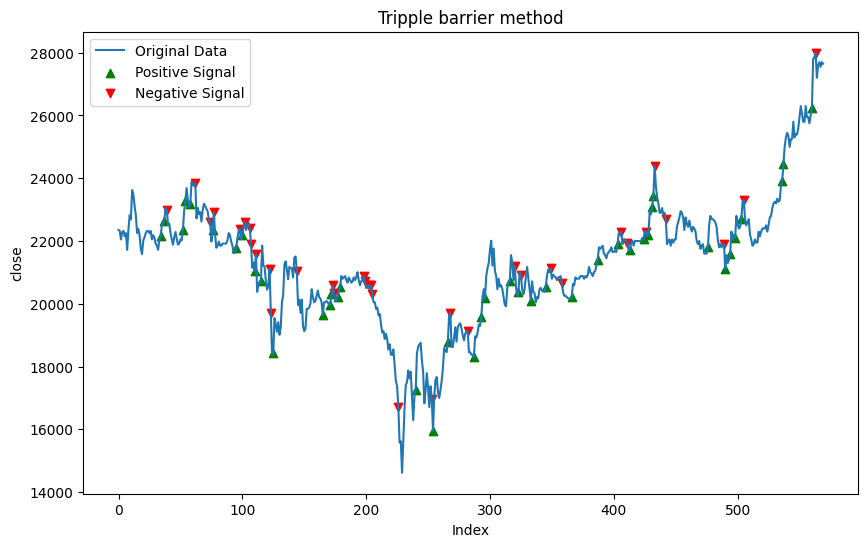

In [464]:
plt.figure(figsize=(10, 6))
plt.plot(data_label['close'], label='Original Data')
plt.scatter(data_label.index[data_label['label'] == 1], data_label['close'][data_label['label'] == 1], color='green', label='Positive Signal', marker='^')
plt.scatter(data_label.index[data_label['label'] == -1], data_label['close'][data_label['label'] == -1], color='red', label='Negative Signal', marker='v')
plt.title('Tripple barrier method')
plt.xlabel('Index')
plt.ylabel('close')
plt.legend()
plt.show()

<AxesSubplot:>

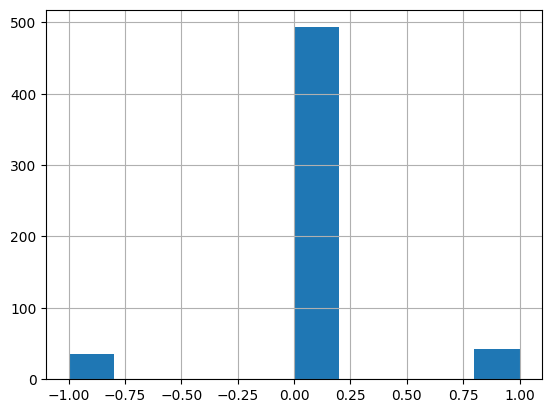

In [465]:
data_label['label'].hist()
